In [27]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, minmax_scale, StandardScaler, LabelEncoder
from scipy.signal import resample, find_peaks
from math import sqrt
#replace the path 
label=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\training_labels.pickle')
train=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\train.pickle')
exp_train=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\exp_validation_data.pickle')
exp_label=pd.read_pickle(r'C:\Users\Shiva\Downloads\_______\Project B\exp_validation_labels.pickle')
pd.set_option('display.max_rows', None)

In [28]:
print(label.shape)
print(np.shape(train))
print(np.shape(exp_train))
print(exp_label.shape)


(925, 2)
(925, 20000, 5)
(24, 100001, 5)
(24, 2)


In [29]:
train_n = np.zeros_like(np.asarray(train)); label_n = np.zeros_like(np.asarray(label))

for i in range (0, len(train)):
    for j in range (1, 5):
        train_n[i][:,j] = minmax_scale(train[i][:,j])

scalar = MinMaxScaler()
label_n = scalar.fit_transform(label)


exptrain_n= np.zeros_like(np.asarray(exp_train)); exp_label_n = np.zeros_like(np.asarray(exp_label))

for i in range (0, len(exp_train)):
    for j in range (1, 5):
        exptrain_n[i][:,j] = minmax_scale(exp_train[i][:,j])

scalar = MinMaxScaler()
exp_label_n = scalar.fit_transform(exp_label)


## Resampling and Reshaping

In [30]:
resample_n = []

# create a dataframe from the normalized data
for i in range (0, len(train)):
    resample_n.append(pd.DataFrame(train_n[i], columns = ['time', '1', '2', '3', '4']))
    # drop the time column
    resample_n[i] = resample_n[i].drop(columns = ['time'])

size = 100

for i in range (0, len(train)):
    resample_n[i] = resample(resample_n[i], size)

print(np.asarray(resample_n).shape)


resample_exp= []

for i in range(0,len(exp_train)):
    resample_exp.append(pd.DataFrame(exptrain_n[i], columns = ['time', '1', '2', '3', '4']))
    # drop the time column
    resample_exp[i] = resample_exp[i].drop(columns = ['time'])

size = 100

for i in range (0, len(exp_train)):
    resample_exp[i] = resample(resample_exp[i], size)

np.asarray(resample_exp).shape


(925, 100, 4)


(24, 100, 4)

In [31]:
df= np.array(resample_n)
X=df.reshape(925,400)
df1=np.array(resample_exp)
exp_x=df1.reshape(24,400)

X

array([[ 0.60534239,  0.60539197,  0.60534239, ...,  0.67415327,
         0.67409926,  0.67415325],
       [ 0.69474374,  0.59052564,  0.51662772, ...,  0.66106985,
         0.56367879,  0.66106953],
       [ 0.81306643,  0.59305464,  0.45219437, ...,  0.6548785 ,
         0.45863536,  0.65487842],
       ...,
       [ 0.62162485,  0.45116907,  0.63684638, ...,  0.3610987 ,
         0.82259358,  0.87232062],
       [ 0.38070146,  0.32493691,  0.62483058, ...,  0.09777036,
         0.80488409,  0.90321542],
       [ 0.25359723,  0.25335784,  0.59798901, ..., -0.03363212,
         0.72919947,  0.72921658]])

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X, label_n, test_size=0.3)
print(y_train.shape)
print(x_train.shape)

(647, 2)
(647, 400)


# Linear Regression model


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
Eskel=LinearRegression()
Eskel.fit(x_train,y_train)
Lambert=Eskel.predict(x_test)


fire=sqrt(mean_squared_error(y_test,Lambert))
print('MSE of LR is:', fire)
wood=mean_absolute_error(y_test,Lambert)
print('MAE of LR is:', wood)


MSE of LR is: 0.5373771752797953
MAE of LR is: 0.35636608641926315


In [34]:
# Leshy=Eskel.predict(exp_x)
# exp_label-Leshy

## Decision Tree

In [35]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

dtmodel=DecisionTreeRegressor()
dtmodel.fit(x_train,y_train)

dtpredict=dtmodel.predict(x_test)

RMSE= sqrt(mean_squared_error(y_test,dtpredict))
print('RMSE value for K= 5 is:', RMSE)
MAE=mean_absolute_error(y_test, dtpredict)
print('MAE value for K=5 is :', MAE)

RMSE value for K= 5 is: 0.2307842951487172
MAE value for K=5 is : 0.1378896882494005


In [36]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores=cross_val_score(dtmodel,x_train, y_train, scoring='neg_mean_absolute_error', cv=cv,n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.145 (0.018)


## KNN (Code name: Whitewolf)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

geralt= KNeighborsRegressor(n_neighbors=5, weights='distance')
geralt.fit(x_train,y_train)
Whitewolf= geralt.predict(x_test)


leshy= sqrt(mean_squared_error(y_test,Whitewolf))
print('RMSE value for K= 5 is:', leshy)
babayaga=mean_absolute_error(y_test, Whitewolf)
print('MAE value for K=5 is :', babayaga)


RMSE value for K= 5 is: 0.06577194534418565
MAE value for K=5 is : 0.03538986603353424


In [38]:
Butcher = scalar.inverse_transform(Whitewolf)
y_test_transform = scalar.inverse_transform(y_test)
y_test_transform-Butcher

array([[-4.23059571e+00, -2.64017004e+00],
       [-2.21331252e-01,  1.46287219e-01],
       [-3.13447549e+00,  1.50846619e+00],
       [-6.70956947e-01,  5.65663917e-01],
       [-2.01231426e-02,  6.47122079e+00],
       [ 1.68567829e-02, -3.54466511e-01],
       [-1.59286528e-01,  1.12742902e+00],
       [-1.97089781e-03, -3.89824179e-01],
       [-4.46996183e-01,  4.05569800e-01],
       [-1.03932297e-01, -2.89832262e-02],
       [-5.52241454e-01,  3.57082877e-01],
       [-6.30167049e-01,  6.03733585e-01],
       [-1.77248898e+01,  4.41370945e-02],
       [-9.20343468e-01,  1.37328267e+00],
       [ 5.77329264e+00, -3.33028792e+00],
       [-1.11325852e+00,  5.12952626e-01],
       [ 1.08284419e+01, -3.09550154e-01],
       [ 6.39407326e+00, -7.48959428e+00],
       [-9.72519261e-01,  3.76202937e-01],
       [ 1.93903955e+00, -5.20632949e-01],
       [ 5.57521807e+00, -2.77581280e-02],
       [-5.61039882e+00, -9.47929386e+00],
       [-2.78928540e+00, -8.40367113e+00],
       [-1.

In [39]:
Cirilla= geralt.predict(exp_x)


Wildhunt= sqrt(mean_squared_error(exp_label_n,Cirilla))
print('RMSE value for K= 5 is:', Wildhunt)
Pavetta=mean_absolute_error(exp_label_n,Cirilla)
print('MAE value for K=5 is :',Pavetta)


RMSE value for K= 5 is: 0.35646350381964675
MAE value for K=5 is : 0.33417263515012885


In [40]:
Cirilla= scalar.inverse_transform(Cirilla)
exp_label-Cirilla

array([[-32.43645146, -16.01681823],
       [-39.969391  , -11.26154921],
       [-53.78603702, -29.49878978],
       [-33.06303167, -25.14492522],
       [-48.72828685, -17.95514724],
       [-48.63883615, -23.47728374],
       [-48.66369042, -18.00310349],
       [-48.67553697, -17.97751641],
       [-32.52884374,  24.94475133],
       [-47.16182738,  20.98798524],
       [-36.43721805,  11.12337628],
       [-22.49825251,  18.59831334],
       [-41.64047623,  15.74464673],
       [ -1.04574321,  16.22591252],
       [ 10.77917451,  32.15980953],
       [ 18.51222773,  29.42170889],
       [-19.58722762,  14.4279311 ],
       [-13.37291613,  24.73064403],
       [-13.22229883,  24.82948228],
       [-19.63368477,  14.36829919],
       [ 37.2956112 ,  21.76357081],
       [ 27.81212304,  16.17566863],
       [ 27.24010519,  15.79996119],
       [ 37.30248149,  21.76011701]])

## SVR (Codename:Whiteflame)


In [41]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Nilfgard=SVR()
Whiteflame=MultiOutputRegressor(Nilfgard)


pipe_svr = (Pipeline([('reg', Whiteflame)]))


grid_param_svr = { 
    'reg__estimator__C': [0.01,0.1,1,10],
    
   
}


Elderblood= (GridSearchCV(estimator=pipe_svr, 
                           param_grid=grid_param_svr, 
                           cv=10,
                           scoring = 'neg_mean_squared_error',
                           n_jobs = -1))

Elderblood=Elderblood.fit(x_train,y_train)
Emhyr= Elderblood.predict(x_test)



In [42]:

svrRMSE= sqrt(mean_squared_error(y_test,Emhyr))
print('RMSE value for K= 5 is:', svrRMSE)
svrMAE=mean_absolute_error(y_test, Emhyr)
print('MAE value for K=5 is :',svrMAE)

RMSE value for K= 5 is: 0.1183354961203512
MAE value for K=5 is : 0.10766707746132283


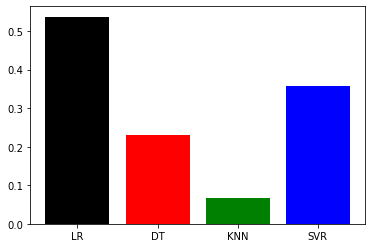

In [56]:
import matplotlib.pyplot as plt
height = [fire, RMSE, leshy, Wildhunt]
bars = ('LR', 'DT', 'KNN', 'SVR')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
label = ['rmse=fire','rmse= RMSE', 'rmse=leshy', 'rmse= Wildhunt']
plt.bar(y_pos, height, color=['black', 'red', 'green', 'blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()



    